In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from tqdm import tqdm

In [12]:
import pandas as pd
studies_csv = pd.read_csv('../raw_data/Updated_Artist_studies_master_1_Jun_2022.csv')
studies_df = studies_csv.copy()
studies_df.shape

(3408, 11)

In [13]:
studies_df.fillna("", inplace = True)

In [14]:
studies_df.shape

(3408, 11)

In [15]:
studies_df.columns = ['l_name', 'f_name',
       'style_represented', 'complete', 'user', 'sgl_img_folder',
       'cards_folder', 'batch_id', 'non_visual',
       'style_or_effect', 'notes']

In [16]:
# filter out styles and non visual artists
artist_df = studies_df[studies_df['complete'].str.contains('x') &
                       ~studies_df['non_visual'].str.contains('x') &
                       ~studies_df['style_or_effect'].str.contains('x')]


In [17]:
artists_interest_df = artist_df[artist_df['batch_id'] == 1.0]
len(artists_interest_df)

142

In [18]:
artists_interest_df.loc[:, 'key'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1).str.replace(' ', '_')

artists_interest_df.loc[:, 'prompt'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1)

In [19]:
import clip
import numpy as np
model, preprocess = clip.load("ViT-B/32", device='cpu', jit=False)

In [20]:
artist_embed_list = []
for artist in tqdm(artists_interest_df.prompt):

    text_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, {artist}, Trending on artstation').to('cpu')
    #print(text_input.shape)
    text_embs = model.encode_text(text_input).float()
    text_embs = text_embs / text_embs.norm(dim=-1, keepdim=True)
    #print(text_embs.shape)
    artist_embed_list.append(text_embs.detach().numpy())

embed_df = pd.DataFrame(np.squeeze(artist_embed_list))

100%|█████████████████████████████████████████| 142/142 [00:20<00:00,  6.99it/s]


In [21]:
embed_df

0         1         2         3         4         5         6    \
0    0.060856 -0.048610  0.085098  0.110647 -0.015314 -0.049621  0.002925   
1    0.085399 -0.117761 -0.003910  0.005902 -0.027171 -0.068051 -0.006034   
2    0.081050 -0.040338 -0.038463  0.003430  0.033889 -0.075861 -0.003295   
3    0.034689 -0.047638 -0.023051  0.008796 -0.012548 -0.003488  0.010828   
4    0.068654 -0.060289 -0.044910  0.042554  0.020124  0.008479 -0.025543   
..        ...       ...       ...       ...       ...       ...       ...   
137  0.068772 -0.047363 -0.025256  0.020914 -0.018167 -0.058979  0.001063   
138  0.072066 -0.037768 -0.022894  0.037549 -0.011522 -0.041016  0.008528   
139  0.073159 -0.051875 -0.028199  0.014220 -0.009945 -0.030573  0.012406   
140  0.090281 -0.061412 -0.021963  0.003676  0.027651 -0.018559  0.007355   
141  0.073974 -0.050723 -0.038476  0.011603 -0.015162 -0.038436  0.004780   

          7         8         9    ...       502       503       504  \
0    0.066412  0.027089  0.046987  ...  0.027022  0.016134  0.111544   
1    0.066743  0.011427  0.024530  ... -0.006515 -0.022902  0.112482   
2    0.043582  0.036815  0.003394  ... -0.042796 -0.001224  0.186604   
3    0.042280 -0.064730 -0.003553  ... -0.029368 -0.036709  0.143131   
4    0.015049  0.015849  0.041042  ... -0.026253 -0.039739  0.114589   
..        ...       ...       ...  ...       ...       ...       ...   
137  0.050730 -0.006029 -0.017066  ... -0.016757 -0.015575  0.099230   
138  0.013830  0.012232 -0.007411  ... -0.025967 -0.033550  0.103679   
139  0.070107 -0.007929 -0.005166  ... -0.014632 -0.012845  0.108811   
140  0.076338 -0.002605  0.007804  ... -0.001165  0.018343  0.127853   
141  0.087024 -0.026495 -0.004418  ... -0.006902 -0.018797  0.102110   

          505       506       507       508       509       510       511  
0    0.051242  0.017555  0.015606  0.053384 -0.029480  0.010939 -0.075493  
1   -0.002940 -0.025733  0.004111  0.027327 -0.059148  0.023553 -0.002351  
2    0.018778 -0.025085 -0.011721  0.041364 -0.074420 -0.000363 -0.029698  
3   -0.017976 -0.008308 -0.004495  0.033111 -0.055005 -0.006516 -0.012002  
4   -0.068940 -0.017004 -0.012452  0.065570 -0.044869  0.015808 -0.041101  
..        ...       ...       ...       ...       ...       ...       ...  
137  0.013258 -0.011088  0.019466  0.043590 -0.087116 -0.030094 -0.007899  
138 -0.004083 -0.011908  0.022762  0.056168 -0.099071 -0.024696 -0.006218  
139  0.001806 -0.010166  0.039878  0.057524 -0.114113 -0.012082 -0.003838  
140  0.033881 -0.004859  0.023573  0.065950 -0.120064  0.010075 -0.010002  
141  0.011754 -0.011103  0.023994  0.071298 -0.124703 -0.025844 -0.016062  

[142 rows x 512 columns]

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(embed_df)

In [23]:
sim_matrix.shape

(142, 142)

In [24]:
np.argsort(sim_matrix)[:, -2]

array([ 81,  15, 108, 114,  67, 134, 121,  73,   4,  73,  73, 106,  13,
        12,  67,  24,  74,  35, 107,  35,  88,  53,  76, 134,  68,  30,
        30,  35,  56,  46, 122,  27, 131, 110,  65, 101,  80,  67,  76,
       139, 140, 119,  49, 138,  92, 139,  74, 134,  27,  65,  52,  89,
        23,  67,   4,  80, 128, 140, 117, 121,  79, 126, 140, 135,  98,
       140,  28,  53,  59,  43,  79,  76,  71, 117,  75,  74,  58,  32,
        88,  38,  55,  76,  67,  73, 107,  73,  56,  24, 106,  77, 117,
        89, 141,  65,  73,  47,  11, 113, 106,  30,  33, 122, 138,  76,
        73,  49, 113,  84, 106, 136, 139,  84, 123,  58, 124, 116, 115,
       121, 134, 129, 110, 117, 131, 114, 114, 131, 139,  33, 114, 119,
       120, 122, 138,  73, 124, 117, 114,  58, 132, 110, 139, 120])

In [25]:
np.unravel_index(np.argmax(sim_matrix), shape = (142, 142))

(33, 33)

In [26]:
sim_matrix[33, 33]

1.0000005

In [27]:
# base prompt
control_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, Trending on artstation').to('cpu')
control_embs = model.encode_text(text_input).float()
control_embs = control_embs / control_embs.norm(dim=-1, keepdim=True)
control_embs = control_embs.detach().numpy()


In [28]:
from sklearn.metrics.pairwise import euclidean_distances

def distance_calc(embeddings, control_embeddings, method = 'cosine'):
    if method == 'cosine':
        control_dist = cosine_similarity(embeddings, control_embeddings)
    elif method == 'both':
        control_dist = (euclidean_distances(embeddings, control_embeddings) + cosine_similarity(embeddings, control_embeddings)) / 2
    else:
        control_dist = euclidean_distances(embeddings, control_embeddings)
    return control_dist

In [29]:
artists_interest_df['control_dist'] = distance_calc(embed_df, control_embs, method = 'cosine')

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_26832/506300744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['control_dist'] = distance_calc(embed_df, control_embs, method = 'cosine')


In [143]:
from artist_studies.loader import ArtLoader 

In [149]:
!ls "../raw_data/batch 2 2/Caniglia_Jeremy"

1_2.png


In [152]:
art_loader = ArtLoader()

# load data

exclude = ['styles single images', 'non-visual artist single images', '1. styles', '2. not recognized']

art_loader.get_image_folders(data_path = '../raw_data',
                             #data_path = 'drive/My Drive/datasets/artist_studies/batch 1',
                             exclude_list = exclude,
                             num_artists = None, 
                             preprocessor = None)

100%|█████████████████████████████████████████| 742/742 [09:09<00:00,  1.35it/s]


In [150]:
#%debug

> /Users/alecsharp/me/artist_studies/artist_studies/loader.py(32)get_all_from_artist()
     30             if img_path.endswith('png')
     31         ]
---> 32         return np.array(pond_img_list)
     33 
     34     def get_image_folders(self,

ipdb> all_image_paths
*** NameError: name 'all_image_paths' is not defined
ipdb> all_img_paths
['1_2.png']
ipdb> pond_img_list
[<PIL.Image.Image image mode=RGB size=1280x1024 at 0x17112F580>]
ipdb> np.array(pond_img_list)


<stdin>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.


*** TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'
ipdb> np.array(pond_img_list, dtype = object)
array([<PIL.Image.Image image mode=RGB size=1280x1024 at 0x17112F580>],
      dtype=object)
ipdb> exit


In [148]:
'.'.split('.')

['', '']

In [145]:
import sys
sum([sys.getsizeof(item) for item in art_loader.__dict__.values()]) * 1e-9 # bytes to gb

4.3740000000000005e-05

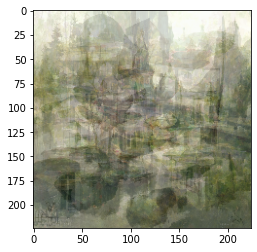

In [35]:
# average of all an artists works
import matplotlib.pyplot as plt
plt.imshow(np.mean(art_loader.array_art_list[:6] / 255, axis = 0))

In [36]:
from unidecode import unidecode
import math

def matching_formatter(string):
    return "".join(sorted(unidecode(string).replace('_', '')))

def sort_strings_in_array(string_array):
    return np.array([matching_formatter(x) for x in string_array])

def get_example_art(artist_key, num_art = 1):
    
    found_idx = np.argwhere(sort_strings_in_array(art_loader.artist_list) == matching_formatter(artist_key)).reshape(-1)
    
    num_art = min([num_art, len(found_idx)])
    
    if len(found_idx) < 1:
        return np.ones((224, 224, 3))
    
    # choose a random image
    idx = list(np.random.choice(found_idx, size = num_art, replace=False))
    
    if num_art == 1:
        return np.squeeze(art_examples[idx])
    
    side_length = math.ceil(np.sqrt(num_art))
    num_padding = (side_length ** 2) - num_art 
    
    art_examples_list = list(art_loader.array_art_list[idx])
    for pad in range(num_padding):
        art_examples_list.append(np.ones((224, 224, 3)))
        
    display_images = np.array(art_examples_list)
    
    stack_list = []
    for i in range(side_length):
        start_idx = (i * side_length)
        image_row = np.hstack(display_images[start_idx: start_idx + side_length])
        stack_list.append(image_row)
        
    return np.vstack(stack_list) / 255

In [37]:
artists_interest_df.head()

l_name     f_name style_represented complete         user  \
9     af Klint      Hilma               Yes        x   proximasan   
13  Aivazovsky       Ivan               Yes        x  KyrickYoung   
17       Amano  Yoshitaka               Yes        x    EErratica   
20    Anderson        Wes               Yes        x    EErratica   
21     Andrews       Esao               Yes        x   sureailabs   

   sgl_img_folder cards_folder batch_id non_visual style_or_effect notes  \
9               x            x      1.0          -               -         
13              x            x      1.0          -               -         
17              x            x      1.0          -               -         
20              x            x      1.0          -               -         
21              x            x      1.0          -               -         

                key           prompt  control_dist  
9    Hilma_af_Klint   Hilma af Klint      0.426733  
13  Ivan_Aivazovsky  Ivan Aivazovsky      0.719048  
17  Yoshitaka_Amano  Yoshitaka Amano      0.744067  
20     Wes_Anderson     Wes Anderson      0.794738  
21     Esao_Andrews     Esao Andrews      0.655489

In [38]:
# Key
artists_interest_df.key[artists_interest_df.key.str.contains("Falter")]

238    John_Philip_Falter
Name: key, dtype: object

In [39]:
# Folder names
pd.Series(np.unique([name for name in art_loader.artist_list if "Falter" in name]))

0    Falter_JohnPhilip
dtype: object

In [40]:
get_example_art(unidecode('Juan_Giménez'), num_art = 4) / 255

array([[[3.79422377e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79438046e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79594974e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

       [[3.77413724e-03, 3.92156886e-03, 3.92156886e-03],
        [3.76848783e-03, 3.92156886e-03, 3.92156886e-03],
        [3.77209694e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

       [[3.78316035e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79846082e-03, 3.92156886e-03, 3.92156886e-03],
        [3.82600119e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92

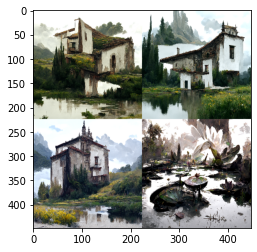

In [41]:
plt.imshow(get_example_art(unidecode('Juan_Giménez'), num_art = 4))

In [42]:
artists_interest_df['path'] = artists_interest_df['key'].copy()

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_26832/3284048176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['path'] = artists_interest_df['key'].copy()


In [43]:
# manually changing some Keys to match folder names
artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
.str.replace("Vincent_Di_Fate", "DiFate_Vincent")\
.str.replace('Zdzisław_Beksiński', 'Beksinski_Zdzislaw-sp')\
.str.replace('Syd_Mead', 'Mead_Syn')\
.str.replace('Johfra_Bosschart', 'Bosschart_Jofra')\
.str.replace('.', '')\
.str.replace('Raffeaello_Ossola', 'Ossola_Raffaello')\
.str.replace('H._R._(Hans_Ruedi)_Giger', 'Giger_HR')
#.str.replace('Agnes_Lawrence_Pelton', 'Pelton_AgnesLawrence')\
#.str.replace("John_Philip_Falter", "Falter_JohnPhilip")
                

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_26832/3652431643.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_26832/3652431643.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_26832/3652431643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_intere

In [122]:
most_influence_idx = np.argsort(artists_interest_df['control_dist'].values)[:50]
least_influence_idx = np.argsort(artists_interest_df['control_dist'].values)[-16:]

In [123]:
most_influence_artists = artists_interest_df.iloc[most_influence_idx][['path', 'key']]
least_influence_artists = artists_interest_df.iloc[least_influence_idx][['path','key']]

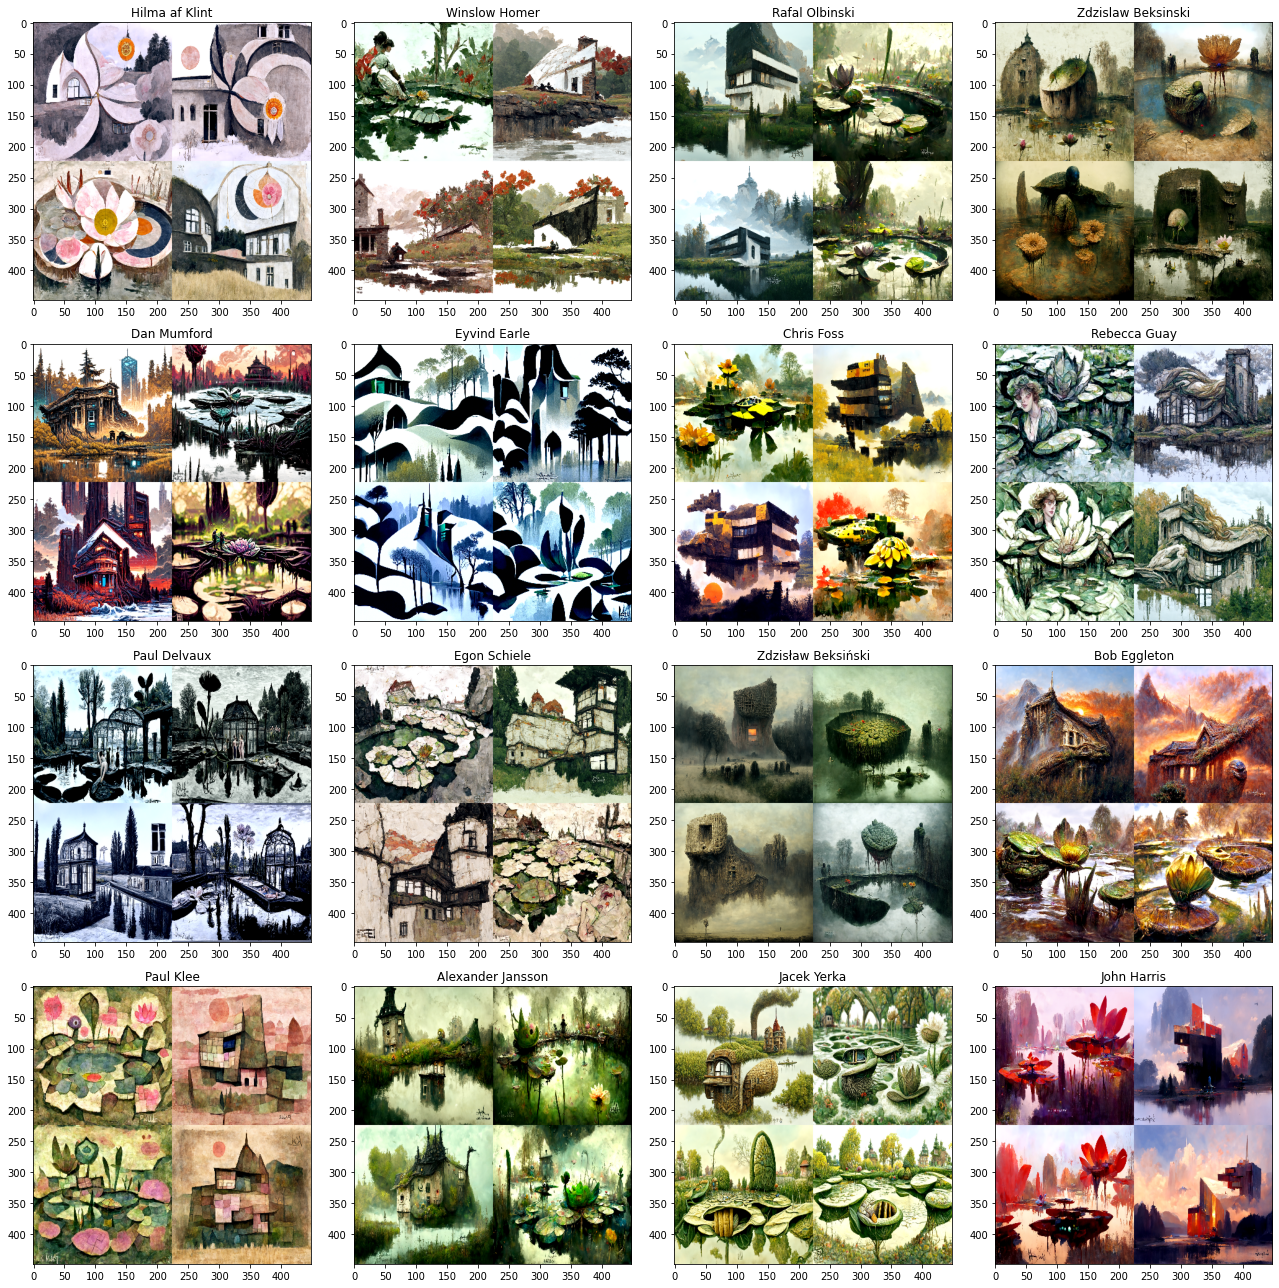

In [124]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, most_influence_artists.key, most_influence_artists.path):
    ax.imshow(get_example_art(artist_path, num_art = 4))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

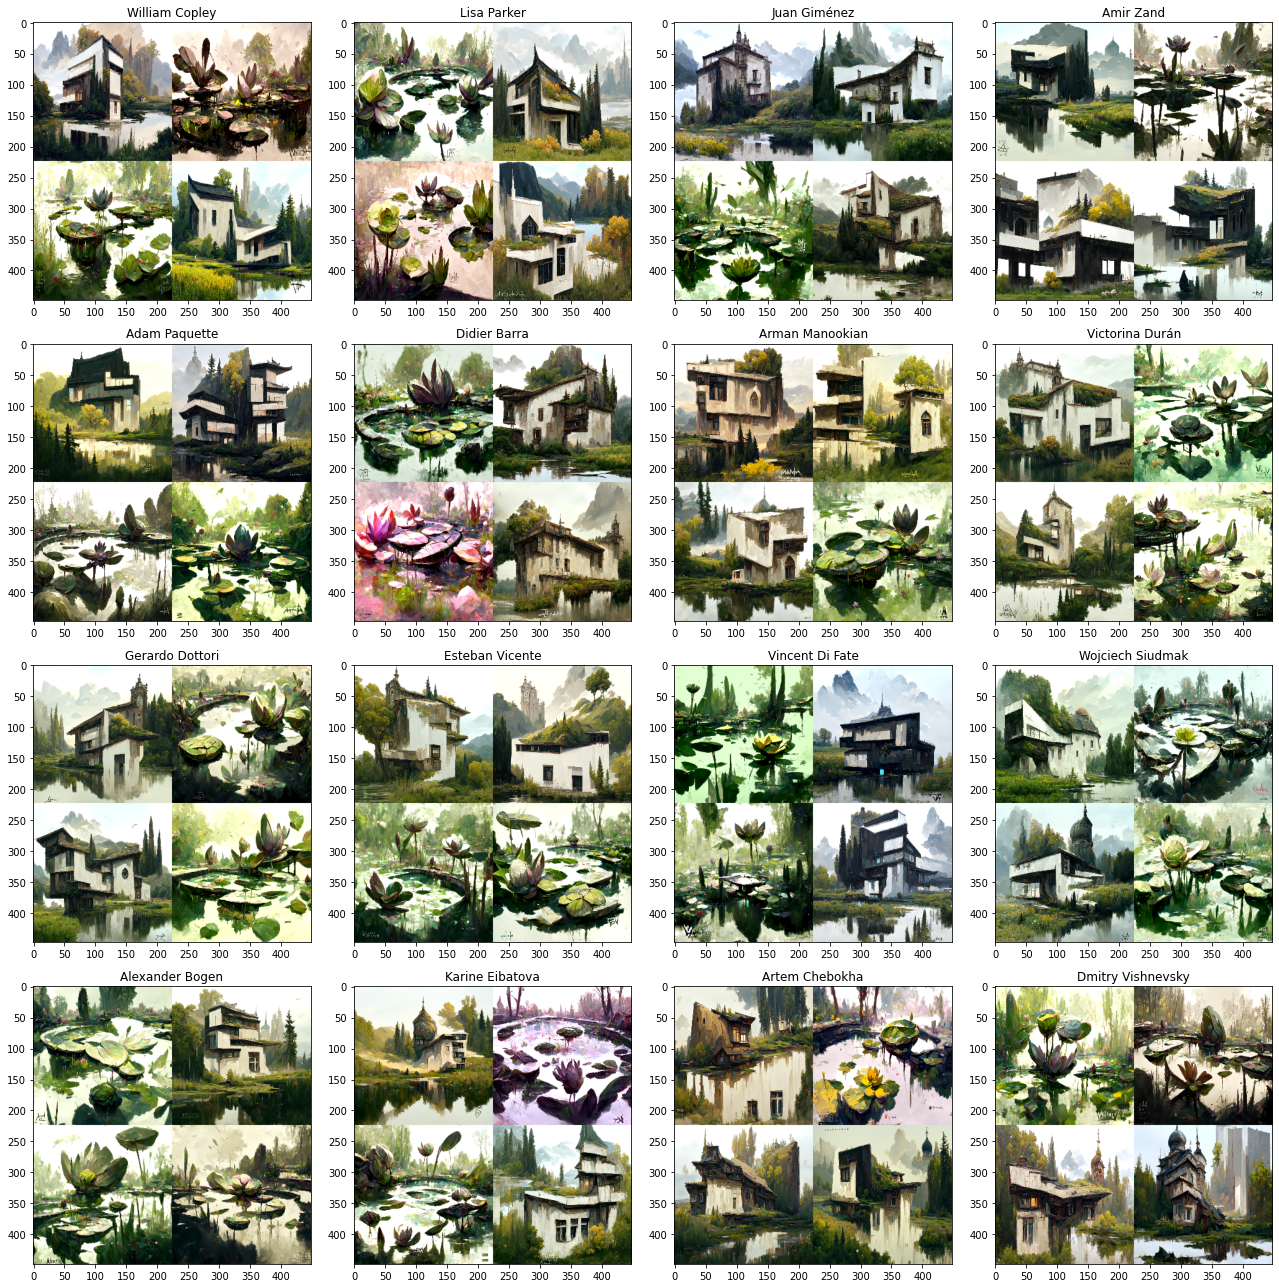

In [125]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, least_influence_artists.key, least_influence_artists.path):
    ax.imshow(get_example_art(artist_path, num_art = 4))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

In [126]:
artists_sorted_df = artists_interest_df.iloc[list(np.argsort(artists_interest_df['control_dist'].values)), :]
artists_sorted_df

l_name     f_name style_represented complete         user  \
9       af Klint      Hilma               Yes        x   proximasan   
353        Homer    Winslow               Yes        x    EErratica   
1187    Olbinski      Rafal            Unsure        x   proximasan   
57     Beksinski   Zdzislaw               Yes        x   sureailabs   
529      Mumford        Dan               Yes        x  KyrickYoung   
...          ...        ...               ...      ...          ...   
1471     Siudmak   Wojciech                No        x   sureailabs   
1157       Bogen  Alexander            Unsure        x   proximasan   
1283    Eibatova     Karine                No        x  KyrickYoung   
1256    Chebokha      Artem                No        x  KyrickYoung   
1501  Vishnevsky     Dmitry                No        x  KyrickYoung   

     sgl_img_folder cards_folder batch_id non_visual style_or_effect  \
9                 x            x      1.0          -               -   
353               x            x      1.0          -               -   
1187              x            x      1.0          -               -   
57                x            x      1.0          -               -   
529               x            x      1.0          -               -   
...             ...          ...      ...        ...             ...   
1471              x            x      1.0          -               -   
1157              x            x      1.0          -               -   
1283              x            x      1.0          -               -   
1256              x            x      1.0          -               -   
1501              x            x      1.0          -               -   

                   notes                 key              prompt  \
9                             Hilma_af_Klint      Hilma af Klint   
353                            Winslow_Homer       Winslow Homer   
1187                          Rafal_Olbinski      Rafal Olbinski   
57    without diacritics  Zdzislaw_Beksinski  Zdzislaw Beksinski   
529                              Dan_Mumford         Dan Mumford   
...                  ...                 ...                 ...   
1471                        Wojciech_Siudmak    Wojciech Siudmak   
1157                         Alexander_Bogen     Alexander Bogen   
1283                         Karine_Eibatova     Karine Eibatova   
1256          AKA RHADS.      Artem_Chebokha      Artem Chebokha   
1501                       Dmitry_Vishnevsky   Dmitry Vishnevsky   

      control_dist                path  
9         0.426733      Hilma_af_Klint  
353       0.456668       Winslow_Homer  
1187      0.465115      Rafal_Olbinski  
57        0.473818  Zdzislaw_Beksinski  
529       0.498036         Dan_Mumford  
...            ...                 ...  
1471      0.954330    Wojciech_Siudmak  
1157      0.962736     Alexander_Bogen  
1283      0.966564     Karine_Eibatova  
1256      0.979240      Artem_Chebokha  
1501      1.000000   Dmitry_Vishnevsky  

[142 rows x 15 columns]

In [127]:
# fig, axes = plt.subplots(12, 12, figsize = (18, 18))

# for ax, artist_key, artist_path in zip(axes.flat, artists_sorted_df.key, artists_sorted_df.path):
#     ax.imshow(get_example_art(artist_path, kind = 'array'))
#     ax.set_title(f'{artist_key.replace("_", " ")}')
# plt.tight_layout()

In [128]:
# # Torch - features w clip
# print(clip.available_models())

# clip_model, preprocess = clip.load('ViT-L/14')
# #print(clip_model)
# clip_model.cuda().eval()
# input_resolution = clip_model.visual.input_resolution
# context_length = clip_model.context_length
# vocab_size = clip_model.vocab_size

# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
# print("Input resolution:", input_resolution)
# print("Context length:", context_length)
# print("Vocab size:", vocab_size)

# def encode_art_to_features(self, model):
#     """turn images into features using a pretrained neural net
#     eg clip because thats what most art models use"""

#     if self.preprocessor:
#       art_array = self.preprocessed_art_list
#     else:
#       art_array = np.stack(self.art_list)

#     image_input = torch.tensor(art_array).cuda()

#     with torch.no_grad():
#         features = model.encode_image(image_input).float()

#     return features.cpu().numpy()

In [129]:
from sklearn.decomposition import PCA

pca = PCA(2)

embed_pcs = pca.fit_transform(embed_df)

In [130]:
embed_pcs[most_influence_idx, :]

array([[ 0.38478738,  0.3569524 ],
       [ 0.3489306 ,  0.19570032],
       [ 0.48312333,  0.00222417],
       [ 0.5546336 , -0.07240013],
       [ 0.35452887, -0.11880494],
       [ 0.3563283 , -0.03091691],
       [ 0.40391856, -0.21988203],
       [ 0.30991593,  0.26793113],
       [ 0.28789926,  0.20218019],
       [ 0.25705773,  0.43539196],
       [ 0.4689175 , -0.08491942],
       [ 0.28793645, -0.23359098],
       [ 0.1647928 ,  0.3017905 ],
       [ 0.2435905 , -0.06462865],
       [ 0.4287223 , -0.03640544],
       [ 0.30854586, -0.34512818],
       [ 0.3191453 , -0.00601392],
       [ 0.2577719 , -0.22990663],
       [ 0.18728383,  0.21339595],
       [ 0.11986201,  0.28355473],
       [ 0.35649785, -0.14876875],
       [ 0.3057085 , -0.01192706],
       [ 0.2764108 , -0.28280354],
       [ 0.15563856,  0.03317938],
       [ 0.2597545 , -0.10973523],
       [ 0.15663503,  0.02942418],
       [ 0.16664022,  0.1732301 ],
       [-0.02171283,  0.11618392],
       [ 0.2217592 ,

In [132]:
example_art_list = [get_example_art(artist_path, num_art = 4) for artist_path in most_influence_artists.path]

In [133]:
len(example_art_list)

50

In [134]:
from artist_studies.image_viz import show_xy_images

In [135]:
x_coords = embed_pcs[most_influence_idx, 0]
y_coords = embed_pcs[most_influence_idx, 1]

np.stack([x_coords, y_coords], axis = 1)

array([[ 0.38478738,  0.3569524 ],
       [ 0.3489306 ,  0.19570032],
       [ 0.48312333,  0.00222417],
       [ 0.5546336 , -0.07240013],
       [ 0.35452887, -0.11880494],
       [ 0.3563283 , -0.03091691],
       [ 0.40391856, -0.21988203],
       [ 0.30991593,  0.26793113],
       [ 0.28789926,  0.20218019],
       [ 0.25705773,  0.43539196],
       [ 0.4689175 , -0.08491942],
       [ 0.28793645, -0.23359098],
       [ 0.1647928 ,  0.3017905 ],
       [ 0.2435905 , -0.06462865],
       [ 0.4287223 , -0.03640544],
       [ 0.30854586, -0.34512818],
       [ 0.3191453 , -0.00601392],
       [ 0.2577719 , -0.22990663],
       [ 0.18728383,  0.21339595],
       [ 0.11986201,  0.28355473],
       [ 0.35649785, -0.14876875],
       [ 0.3057085 , -0.01192706],
       [ 0.2764108 , -0.28280354],
       [ 0.15563856,  0.03317938],
       [ 0.2597545 , -0.10973523],
       [ 0.15663503,  0.02942418],
       [ 0.16664022,  0.1732301 ],
       [-0.02171283,  0.11618392],
       [ 0.2217592 ,

50it [00:00, 874.05it/s]


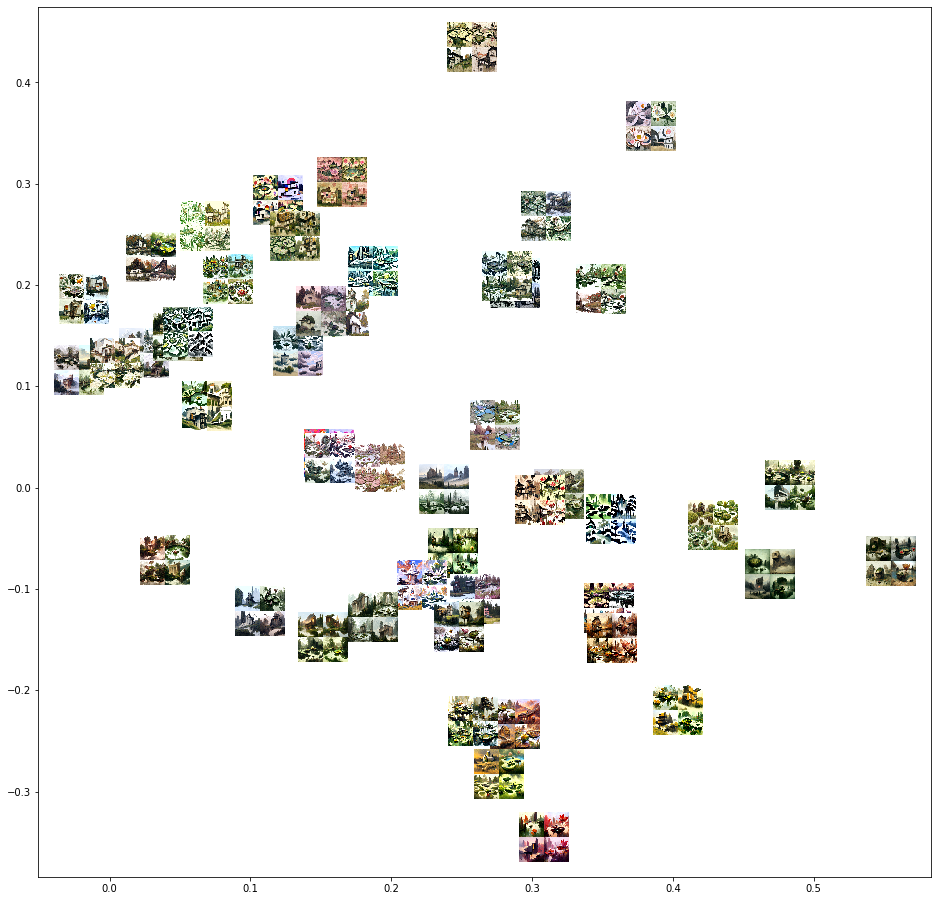

In [136]:
show_xy_images(x_coords = x_coords, 
               y_coords = y_coords, 
               img_list = example_art_list)